In [1]:
"""Example 1: Opening FLORIS and Computing Power

This example illustrates several of the key concepts in FLORIS. It demonstrates:

  1) Initializing a FLORIS model
  2) Changing the wind farm layout
  3) Changing the incoming wind speed, wind direction and turbulence intensity
  4) Running the FLORIS simulation
  5) Getting the power output of the turbines

Main concept is introduce FLORIS and illustrate essential structure of most-used FLORIS calls
"""


import numpy as np

from floris import FlorisModel


# The FlorisModel class is the entry point for most usage.
# Initialize using an input yaml file
fmodel = FlorisModel("inputs/gch.yaml")

# Changing the wind farm layout uses FLORIS' set method to a two-turbine layout
fmodel.set(layout_x=[0, 500.0], layout_y=[0.0, 0.0])

# Changing wind speed, wind direction, and turbulence intensity uses the set method
# as well. Note that the wind_speeds, wind_directions, and turbulence_intensities
# are all specified as arrays of the same length.
fmodel.set(
    wind_directions=np.array([270.0]), wind_speeds=[8.0], turbulence_intensities=np.array([0.06])
)

# Note that typically all 3, wind_directions, wind_speeds and turbulence_intensities
# must be supplied to set.  However, the exception is if not changing the length
# of the arrays, then only one or two may be supplied.
fmodel.set(turbulence_intensities=np.array([0.07]))

# The number of elements in the wind_speeds, wind_directions, and turbulence_intensities
# corresponds to the number of conditions to be simulated.  In FLORIS, each of these are
# tracked by a simple index called a findex.  There is no requirement that the values
# be unique.  Internally in FLORIS, most data structures will have the findex as their
# 0th dimension.  The value n_findex is the total number of conditions to be simulated.
# This command would simulate 4 conditions (n_findex = 4).
fmodel.set(
    wind_directions=np.array([270.0, 270.0, 270.0, 270.0]),
    wind_speeds=[8.0, 8.0, 10.0, 10.0],
    turbulence_intensities=np.array([0.06, 0.06, 0.06, 0.06]),
)

# After the set method, the run method is called to perform the simulation
fmodel.run()

# There are functions to get either the power of each turbine, or the farm power
turbine_powers = fmodel.get_turbine_powers() / 1000.0
farm_power = fmodel.get_farm_power() / 1000.0

print("The turbine power matrix should be of dimensions 4 (n_findex) X 2 (n_turbines)")
print(turbine_powers)
print("Shape: ", turbine_powers.shape)

print("The farm power should be a 1D array of length 4 (n_findex)")
print(farm_power)
print("Shape: ", farm_power.shape)
import warnings
warnings.filterwarnings('ignore')

The turbine power matrix should be of dimensions 4 (n_findex) X 2 (n_turbines)
[[1753.95445918  354.99076413]
 [1753.95445918  354.99076413]
 [3417.79700509  737.17166538]
 [3417.79700509  737.17166538]]
Shape:  (4, 2)
The farm power should be a 1D array of length 4 (n_findex)
[2108.94522331 2108.94522331 4154.96867047 4154.96867047]
Shape:  (4,)


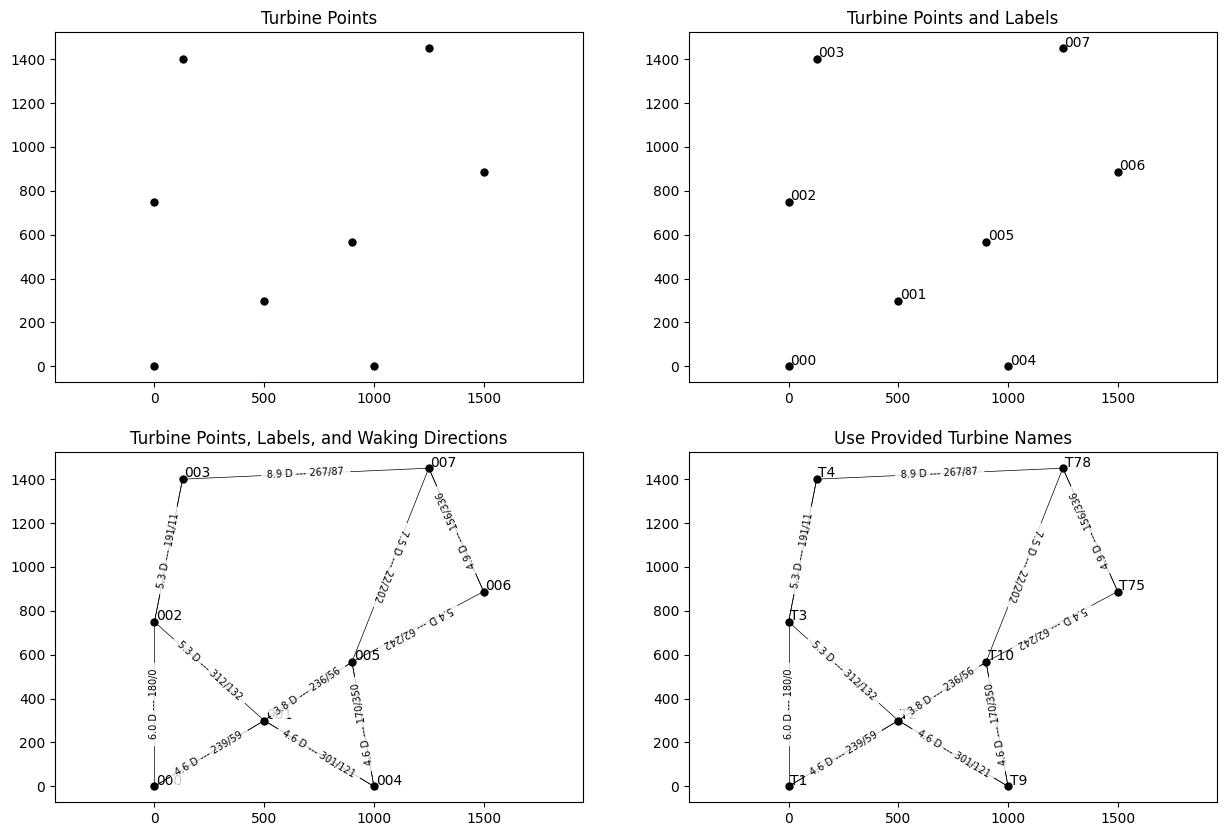

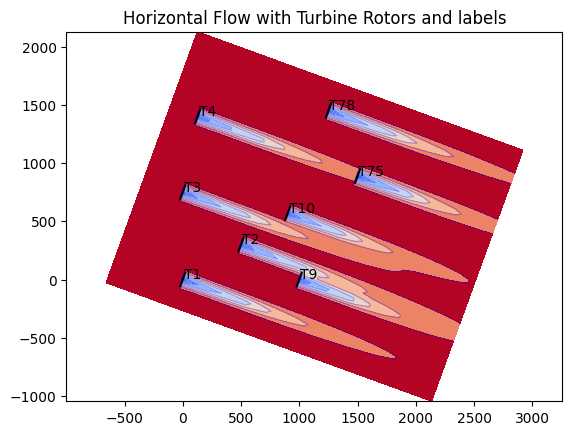

In [4]:
"""Example 2: Visualizations

This example demonstrates the use of the flow and layout visualizations in FLORIS.
First, an example wind farm layout is plotted, with the turbine names and the directions
and distances between turbines shown in different configurations by subplot.
Next, the horizontal flow field at hub height is plotted for a single wind condition.

FLORIS includes two modules for visualization:
  1) flow_visualization: for visualizing the flow field
  2) layout_visualization: for visualizing the layout of the wind farm
The two modules can be used together to visualize the flow field and the layout
of the wind farm.

"""


import matplotlib.pyplot as plt

import floris.layout_visualization as layoutviz
from floris import FlorisModel
from floris.flow_visualization import visualize_cut_plane


fmodel = FlorisModel("inputs/gch.yaml")

# Set the farm layout to have 8 turbines irregularly placed
layout_x = [0, 500, 0, 128, 1000, 900, 1500, 1250]
layout_y = [0, 300, 750, 1400, 0, 567, 888, 1450]
fmodel.set(layout_x=layout_x, layout_y=layout_y)


# Layout visualization contains the functions for visualizing the layout:
# plot_turbine_points
# plot_turbine_labels
# plot_turbine_rotors
# plot_waking_directions
# Each of which can be overlaid to provide further information about the layout
# This series of 4 subplots shows the different ways to visualize the layout

# Create the plotting objects using matplotlib
fig, axarr = plt.subplots(2, 2, figsize=(15, 10), sharex=False)
axarr = axarr.flatten()

ax = axarr[0]
layoutviz.plot_turbine_points(fmodel, ax=ax)
ax.set_title("Turbine Points")

ax = axarr[1]
layoutviz.plot_turbine_points(fmodel, ax=ax)
layoutviz.plot_turbine_labels(fmodel, ax=ax)
ax.set_title("Turbine Points and Labels")

ax = axarr[2]
layoutviz.plot_turbine_points(fmodel, ax=ax)
layoutviz.plot_turbine_labels(fmodel, ax=ax)
layoutviz.plot_waking_directions(fmodel, ax=ax, limit_num=2)
ax.set_title("Turbine Points, Labels, and Waking Directions")

# In the final subplot, use provided turbine names in place of the t_index
ax = axarr[3]
turbine_names = ["T1", "T2", "T3", "T4", "T9", "T10", "T75", "T78"]
layoutviz.plot_turbine_points(fmodel, ax=ax)
layoutviz.plot_turbine_labels(fmodel, ax=ax, turbine_names=turbine_names)
layoutviz.plot_waking_directions(fmodel, ax=ax, limit_num=2)
ax.set_title("Use Provided Turbine Names")


# Visualizations of the flow field are made by using calculate plane methods.  In this example
# we show the horizontal plane at hub height, further examples are provided within
# the examples_visualizations folder

# For flow visualizations, the FlorisModel may be set to run a single condition
# (n_findex = 1). Otherwise, the user may set multiple conditions and then use
# the findex_for_viz keyword argument to calculate_horizontal_plane to specify which
# flow condition to visualize.
fmodel.set(wind_speeds=[8.0], wind_directions=[290.0], turbulence_intensities=[0.06])
horizontal_plane = fmodel.calculate_horizontal_plane(
    x_resolution=200,
    y_resolution=100,
    height=90.0,
)

# Plot the flow field with rotors
fig, ax = plt.subplots()
visualize_cut_plane(
    horizontal_plane,
    ax=ax,
    label_contours=False,
    title="Horizontal Flow with Turbine Rotors and labels",
)

# Plot the turbine rotors
layoutviz.plot_turbine_rotors(fmodel, ax=ax)
layoutviz.plot_turbine_labels(fmodel, ax=ax, turbine_names=turbine_names)

plt.show()
import warnings
warnings.filterwarnings('ignore')

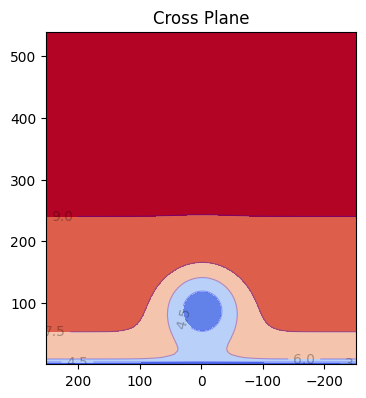

In [9]:
"""Example: Visualize cross plane

Demonstrate visualizing a plane cut vertically through the flow field across the wind direction.

"""

import matplotlib.pyplot as plt

from floris import FlorisModel
from floris.flow_visualization import visualize_cut_plane


fmodel = FlorisModel("inputs/gch.yaml")

# Set a 1 turbine layout
fmodel.set(
    layout_x=[0],
    layout_y=[0],
    wind_directions=[270],
    wind_speeds=[8],
    turbulence_intensities=[0.06],
)

# Collect the cross plane downstream of the turbine
cross_plane = fmodel.calculate_cross_plane(
    y_resolution=100,
    z_resolution=100,
    downstream_dist=500.0,
)

# Plot the flow field
fig, ax = plt.subplots(figsize=(4, 6))
visualize_cut_plane(
    cross_plane, ax=ax, min_speed=3, max_speed=9, label_contours=True, title="Cross Plane"
)

plt.show()

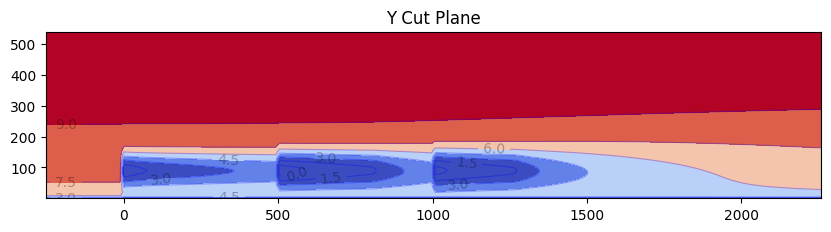

In [8]:
"""Example: Visualize y cut plane

Demonstrate visualizing a plane cut vertically through the flow field along the wind direction.

"""

import matplotlib.pyplot as plt

from floris import FlorisModel
from floris.flow_visualization import visualize_cut_plane


fmodel = FlorisModel("inputs/gch.yaml")

# Set a 3 turbine layout with wind direction along the row
fmodel.set(
    layout_x=[0, 500, 1000],
    layout_y=[0, 0, 0],
    wind_directions=[270],
    wind_speeds=[8],
    turbulence_intensities=[0.06],
)

# Collect the yplane
y_plane = fmodel.calculate_y_plane(x_resolution=200, z_resolution=100, crossstream_dist=0.0)

# Plot the flow field
fig, ax = plt.subplots(figsize=(10, 4))
visualize_cut_plane(
    y_plane, ax=ax, min_speed=3, max_speed=9, label_contours=True, title="Y Cut Plane"
)

plt.show()

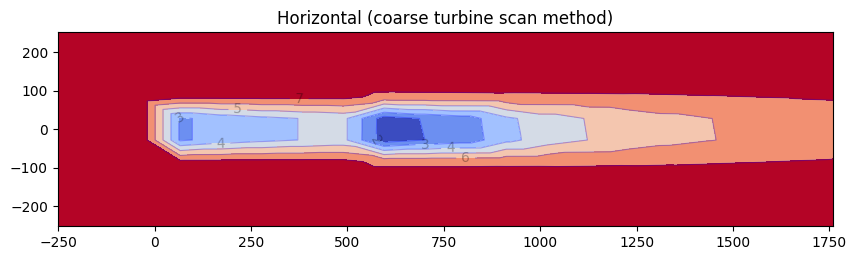

In [11]:
"""Example: Visualize flow by sweeping turbines

Demonstrate the use calculate_horizontal_plane_with_turbines

"""

import matplotlib.pyplot as plt

import floris.flow_visualization as flowviz
from floris import FlorisModel


fmodel = FlorisModel("inputs/gch.yaml")

# # Some wake models may not yet have a visualization method included, for these cases can use
# # a slower version which scans a turbine model to produce the horizontal flow


# Set a 2 turbine layout
fmodel.set(
    layout_x=[0, 500],
    layout_y=[0, 0],
    wind_directions=[270],
    wind_speeds=[8],
    turbulence_intensities=[0.06],
)

horizontal_plane_scan_turbine = flowviz.calculate_horizontal_plane_with_turbines(
    fmodel,
    x_resolution=20,
    y_resolution=10,
)

fig, ax = plt.subplots(figsize=(10, 4))
flowviz.visualize_cut_plane(
    horizontal_plane_scan_turbine,
    ax=ax,
    label_contours=True,
    title="Horizontal (coarse turbine scan method)",
)


plt.show()